# Jonathan Halverson
# Tuesday, March 29, 2016
# Paired data versus t-test

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [36]:
df = pd.read_csv('textbooks.txt', sep='\t')
df.head()

,deptAbbr,course,ibsn,uclaNew,amazNew,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


In [37]:
df.describe()

,uclaNew,amazNew,diff
count,73.000000,73.000000,73.000000
mean,72.221918,59.460274,12.761644
std,59.659128,48.995571,14.255301
min,10.500000,8.600000,-9.530000
25%,24.700000,20.210000,3.800000
50%,43.560000,34.950000,8.230000
75%,116.000000,88.090000,17.590000
max,214.500000,176.000000,66.000000


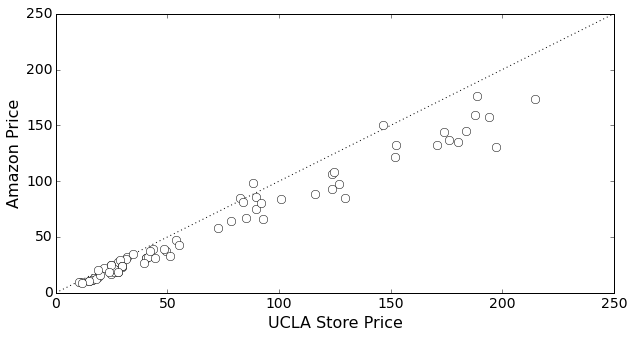

In [38]:
plt.plot([0, 250], [0, 250], 'k:')
plt.plot(df.uclaNew, df.amazNew, 'wo')
plt.xlabel('UCLA Store Price')
plt.ylabel('Amazon Price')

### We see that the points tend to fall below the line indicating the Amazon price tends to be cheaper. Is this effect real or by chance?

In [39]:
ucla_mean = df['uclaNew'].mean()
ucla_var = df['uclaNew'].var()

amaz_mean = df['amazNew'].mean()
amaz_var = df['amazNew'].var()

diff_mean = df['diff'].mean()
diff_std = df['diff'].std()

In [53]:
print ucla_mean, ucla_var
print amaz_mean, amaz_var
print diff_mean, diff_std

72.2219178082 3559.21158794
59.4602739726 2400.56594159
12.7616438356 14.2553007698


### Given the paired data, let's proceed using the diff series:

In [49]:
SE = diff_std / np.sqrt(len(df))
T = (diff_mean - 0.0) / SE
T

7.6487711124797517

In [50]:
from scipy.stats import t
2 * (1.0 - t.cdf(T, len(df) - 1))

6.9275696290560518e-11

### This calculation clearly shows that the Amazon prices are statistically significant below the book store prices.